In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (accuracy_score, balanced_accuracy_score,
                             classification_report, plot_confusion_matrix,
                             roc_auc_score)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier
from utils import *
import numpy as np
from collections import Counter



In [13]:
X_train = pd.read_csv("../dataset/train_poly.csv")
X_test = pd.read_csv("../dataset/test_poly.csv")
y_train = X_train.match
y_test = X_test.match

X_train = X_train.drop("match",1)
X_test = X_test.drop("match",1)

In [14]:

parameters = {
    "learning_rate": [0.01, 0.05, 0.1],
    "min_samples_split": [0.2, 0.3],
    "min_samples_leaf": [0.3, 0.4],
    "max_depth":[3, 5, 8],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.8, 1.0]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring='balanced_accuracy',refit=True,cv=2, n_jobs=-1)


In [15]:


clf.fit(X_train, y_train)
best_parameters = clf.best_params_


In [25]:
model = GradientBoostingClassifier(**best_parameters,n_estimators=1000)
model.fit(X_train, y_train)

GradientBoostingClassifier(max_features='sqrt', min_samples_leaf=0.3,
                           min_samples_split=0.2, n_estimators=1000)

In [26]:
Y_hat_test = model.predict(X_test)
y_hat_train = model.predict(X_train)

print(classification_report(y_test, Y_hat_test))
print(classification_report(y_train, y_hat_train))
print(balanced_accuracy_score(y_test, Y_hat_test))
# disp = plot_confusion_matrix(model, X_test, y_test,
#                              cmap=plt.cm.Blues)
# disp.ax_.set_title('title')

# plt.show()

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1979
           1       0.52      0.25      0.34       402

    accuracy                           0.83      2381
   macro avg       0.69      0.60      0.62      2381
weighted avg       0.80      0.83      0.81      2381

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4617
           1       0.68      0.35      0.46       936

    accuracy                           0.86      5553
   macro avg       0.78      0.66      0.69      5553
weighted avg       0.85      0.86      0.84      5553

0.6013866996498055


In [34]:
eec = EasyEnsembleClassifier(random_state=42,
                              n_jobs=-1,
                              base_estimator=GradientBoostingClassifier(**best_parameters,
                                                                        n_estimators=100))

eec.fit(X_train, y_train)

EasyEnsembleClassifier(base_estimator=GradientBoostingClassifier(max_features='sqrt',
                                                                 min_samples_leaf=0.3,
                                                                 min_samples_split=0.2),
                       n_jobs=-1, random_state=42)

              precision    recall  f1-score   support

           0       1.00      0.68      0.81      1979
           1       0.39      1.00      0.56       402

    accuracy                           0.73      2381
   macro avg       0.69      0.84      0.68      2381
weighted avg       0.90      0.73      0.77      2381

              precision    recall  f1-score   support

           0       1.00      0.70      0.82      4617
           1       0.40      1.00      0.57       936

    accuracy                           0.75      5553
   macro avg       0.70      0.85      0.70      5553
weighted avg       0.90      0.75      0.78      5553

0.8383411391752706


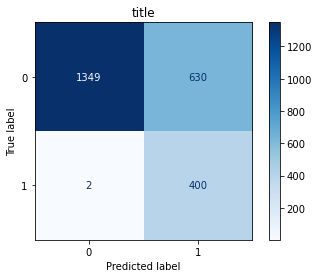

In [35]:
Y_hat_test = eec.predict(X_test)
y_hat_train = eec.predict(X_train)

print(classification_report(y_test, Y_hat_test))
print(classification_report(y_train, y_hat_train))
print(balanced_accuracy_score(y_test, Y_hat_test))

# disp = plot_confusion_matrix(eec, X_test, y_test,
#                              cmap=plt.cm.Blues)
# disp.ax_.set_title('title')

# plt.show()